In [2]:
# Load in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import joblib


In [3]:
#reading the data
df = pd.read_csv(r"C:\Users\ishas\OneDrive\Desktop\Intern\data\raw_data.csv")

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

data_path = r"C:\Users\ishas\OneDrive\Desktop\Intern\data\raw_data.csv"


def preprocess_data(data_path):
    # Load data
    df = pd.read_csv(data_path)

    # Convert specific columns to strings with defined mappings
    replacements = {
        'Home': {0: 'friend', 1: 'rent', 2: 'owner', 3: 'priv', 4: 'ignore', 5: 'parents', 6: 'other'},
        'Records': {1: 'no_rec', 2: 'yes_rec'},
        'Job': {0: 'fulltime', 1: 'fixed', 2: 'partime', 3: 'freelance', 4: 'others'},
        'Marital': {0: 'seperated', 1: 'single', 2: 'married', 3: 'divorced', 4: 'other', 5: 'widowed'}
    }
    for column, mapping in replacements.items():
        df[column] = df[column].replace(mapping)

    # Convert "Status" column values to strings
    df['Status'] = df['Status'].replace({0: "average", 1: "good", 2: "bad"})

    # Optimization: Combine categorical features lists for clarity
    categorical_features = df.select_dtypes(include=['object']).columns
    # categorical_features_to_encode = categorical_features.drop(list(replacements.keys()))
    categorical_features_to_encode = categorical_features.drop(["Status"] + list(replacements.keys()))
    # Handle missing values, numerical scaling, and categorical encoding
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

    # Impute missing values (maintaining integer types)
    numeric_transformer = SimpleImputer(strategy='mean')
    df[numeric_features] = numeric_transformer.fit_transform(df[numeric_features]).astype('int64')

    # Encode remaining categorical features with OrdinalEncoder
    categorical_transformer = OrdinalEncoder()
    df[categorical_features_to_encode] = categorical_transformer.fit_transform(
        df[categorical_features_to_encode])

    # Split the data into features and target variable
    X = df.drop("Status", axis=1)
    y = df["Status"]

    # Save the processed data to a new CSV file
    df.to_csv(r"C:\Users\ishas\OneDrive\Desktop\Intern\data\processed_data.csv", index=False)

# Call the function with the provided data_path
preprocess_data(data_path)


In [5]:
# p = pd.read_csv(r"C:\Users\ishas\OneDrive\Desktop\Intern\data\raw_data.csv")
X = df.drop("Status", axis=1)
y = df["Status"]
c = y.value_counts()
print(c)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Status
1    3201
2    1254
Name: count, dtype: int64


In [6]:
#identify categorical columns in a DataFrame X
cat_mask =X.dtypes==object
cat_cols = X.columns[cat_mask].tolist()
print(cat_cols)


[]


In [7]:
#using the LabelEncoder from the preprocessing module in scikit-learn to transform categorical variables in the DataFrame X into numerical labels
le = preprocessing.LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col))


In [8]:
#using scikit-learn to create a k-nearest neighbors (KNN) classifier.
#KNN CLASSIFIER
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Precision - KNN Classifier: 0.704987036331829
Recall - KNN Classifier: 0.7182940516273849
F1-Score - KNN Classifier: 0.663000261994858
accuracy - KNN Classifier: : 0.7182940516273849


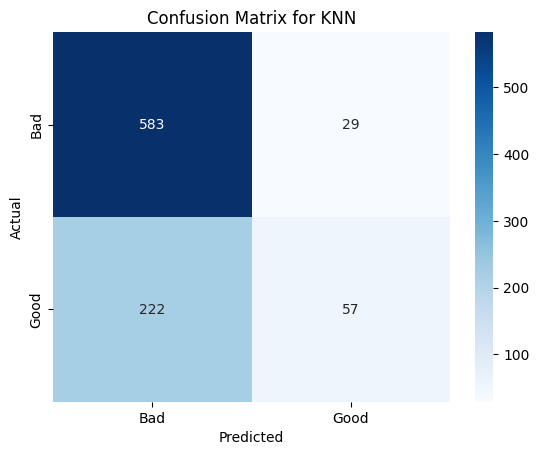

In [9]:

preKnn = neigh.predict(X_test)
precision_knn = precision_score(y_test, preKnn, average='weighted')
recall_knn = recall_score(y_test, preKnn, average='weighted')
f1_knn = f1_score(y_test, preKnn, average='weighted')

print("Precision - KNN Classifier:", precision_knn)
print("Recall - KNN Classifier:", recall_knn)
print("F1-Score - KNN Classifier:", f1_knn)
print("accuracy - KNN Classifier: :" ,accuracy_score(y_test, preKnn))

# Save the trained Gradient Boosting Classifier model to a file
joblib.dump(neigh, 'knn_model.joblib')

cm = confusion_matrix(y_test, preKnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()




In [10]:
#RANDOM FOREST CLASSIFIER
forest = RandomForestClassifier(max_depth=2, random_state=0)
x= forest.fit(X_train,y_train)


In [11]:
preForest = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, preForest)
precision_forest = precision_score(y_test, preForest, average='weighted')
recall_forest = recall_score(y_test, preForest, average='weighted')
f1_forest = f1_score(y_test, preForest, average='weighted')

print("Precision - Random Forest Classifier:", precision_forest)
print("Recall - Random Forest Classifier:", recall_forest)
print("F1-Score - Random Forest Classifier:", f1_forest)
print("Accuracy - Random Forest Classifier:", accuracy_forest)


# Save the trained Random Forest model to a file
joblib.dump(forest, 'random_forest_model.joblib')

Precision - Random Forest Classifier: 0.7924513089849464
Recall - Random Forest Classifier: 0.7025813692480359
F1-Score - Random Forest Classifier: 0.5945492465020196
Accuracy - Random Forest Classifier: 0.7025813692480359


['random_forest_model.joblib']

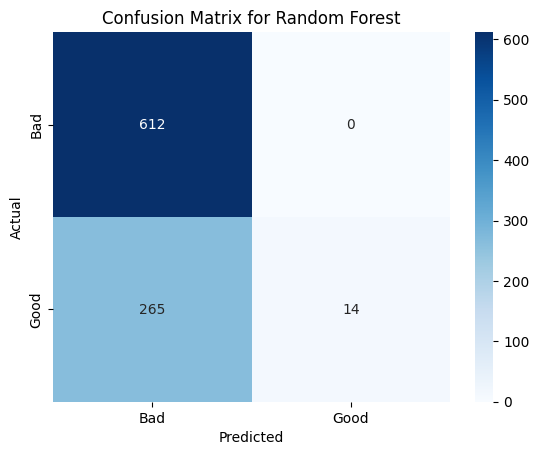

In [12]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, preForest)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [13]:

#LOGISTIC REGRESSION
from sklearn.preprocessing import StandardScaler

#Standardizing features ensures that all features have the same scale to improve the performance and convergence.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test) 

logRegr = LogisticRegression(max_iter=1000, random_state=0, class_weight="balanced").fit(X_train_scaled, y_train)
pred_logReg = logRegr.predict(X_test_scaled)
precision_logReg = precision_score(y_test, pred_logReg, average='weighted')
recall_logReg = recall_score(y_test, pred_logReg, average='weighted')
f1_logReg = f1_score(y_test, pred_logReg, average='weighted')
accuracy_logReg = accuracy_score(y_test, pred_logReg)

print("Precision - Logistic Regression:", precision_logReg)
print("Recall - Logistic Regression:", recall_logReg)
print("F1-Score - Logistic Regression:", f1_logReg)
print("Accuracy - Logistic Regression:", accuracy_logReg)

# Save the trained Logistic regression model to a file
joblib.dump(logRegr, 'logistic_regression_model.joblib')

Precision - Logistic Regression: 0.7507129327195364
Recall - Logistic Regression: 0.7138047138047138
F1-Score - Logistic Regression: 0.7229547005519669
Accuracy - Logistic Regression: 0.7138047138047138


['logistic_regression_model.joblib']

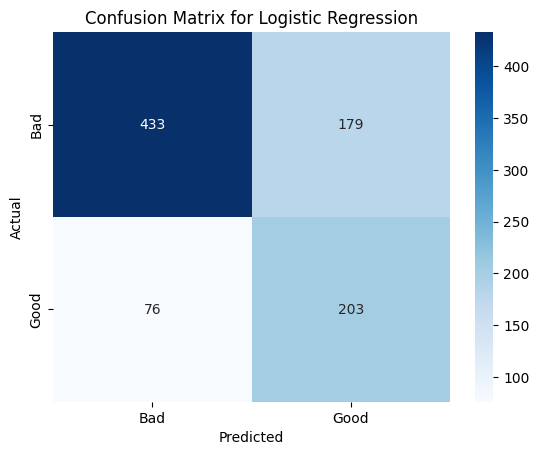

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, pred_logReg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [15]:
#GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=0)
x = gb_classifier.fit(X_train, y_train)
pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test,pred_gb)
precision_gb = precision_score(y_test, pred_gb, average='weighted')
recall_gb = recall_score(y_test, pred_gb, average='weighted')
f1_gb = f1_score(y_test, pred_gb, average='weighted')

print("Precision - Gradient Boosting Classifier:", precision_gb)
print("Recall - Gradient Boosting Classifier:", recall_gb)
print("F1-Score - Gradient Boosting Classifier:", f1_gb)
print("Accuracy - Gradient Boosting:",accuracy_gb)

# Save the trained Gradient Boosting Classifier model to a file
joblib.dump(gb_classifier, 'gb_classifier_model.joblib')




Precision - Gradient Boosting Classifier: 0.7850819949688324
Recall - Gradient Boosting Classifier: 0.7867564534231201
F1-Score - Gradient Boosting Classifier: 0.7675375212633037
Accuracy - Gradient Boosting: 0.7867564534231201


['gb_classifier_model.joblib']

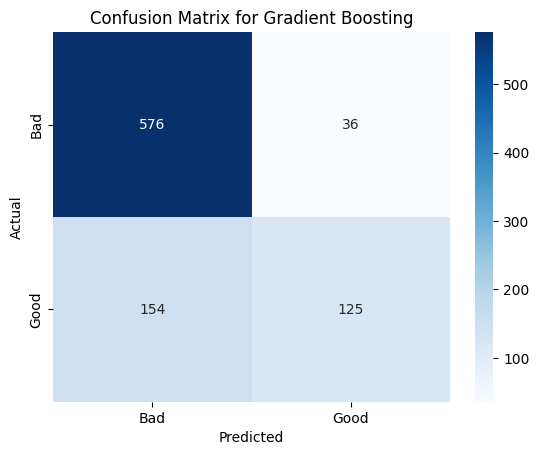

In [23]:
cm = confusion_matrix(y_test, pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()


In [17]:
# Load the Gradient Boosting Classifier model from the file
loaded_gradient_model = joblib.load('gb_classifier_model.joblib')

# Load the Random Forest model from the file
loaded_forest_model = joblib.load('random_forest_model.joblib')

#using k-fold cross-validation to evaluate the performance of two different classifiers (Gradient Boosting and Random Forest) on both the training and testing datasets
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(loaded_gradient_model, X_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy(GB_train): %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(loaded_gradient_model, X_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy(GB_test): %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(loaded_forest_model, X_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy(Rf_train): %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(loaded_forest_model, X_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy(Rf_test): %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

#comparing the mean accuracy and standard deviation of the accuracy across the folds
n_groups = 2
algorithms = ('GradientBoosting', 'Random Forest')
train_accuracy = (DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,)
test_accuracy = (DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0)

Standard_Deviation=(DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0)

Mean Accuracy(GB_train): 79.489%, Standard Deviation: (2.67%)
Mean Accuracy(GB_test): 75.650%, Standard Deviation: (2.92%)
Mean Accuracy(Rf_train): 73.485%, Standard Deviation: (3.29%)
Mean Accuracy(Rf_test): 72.277%, Standard Deviation: (3.63%)


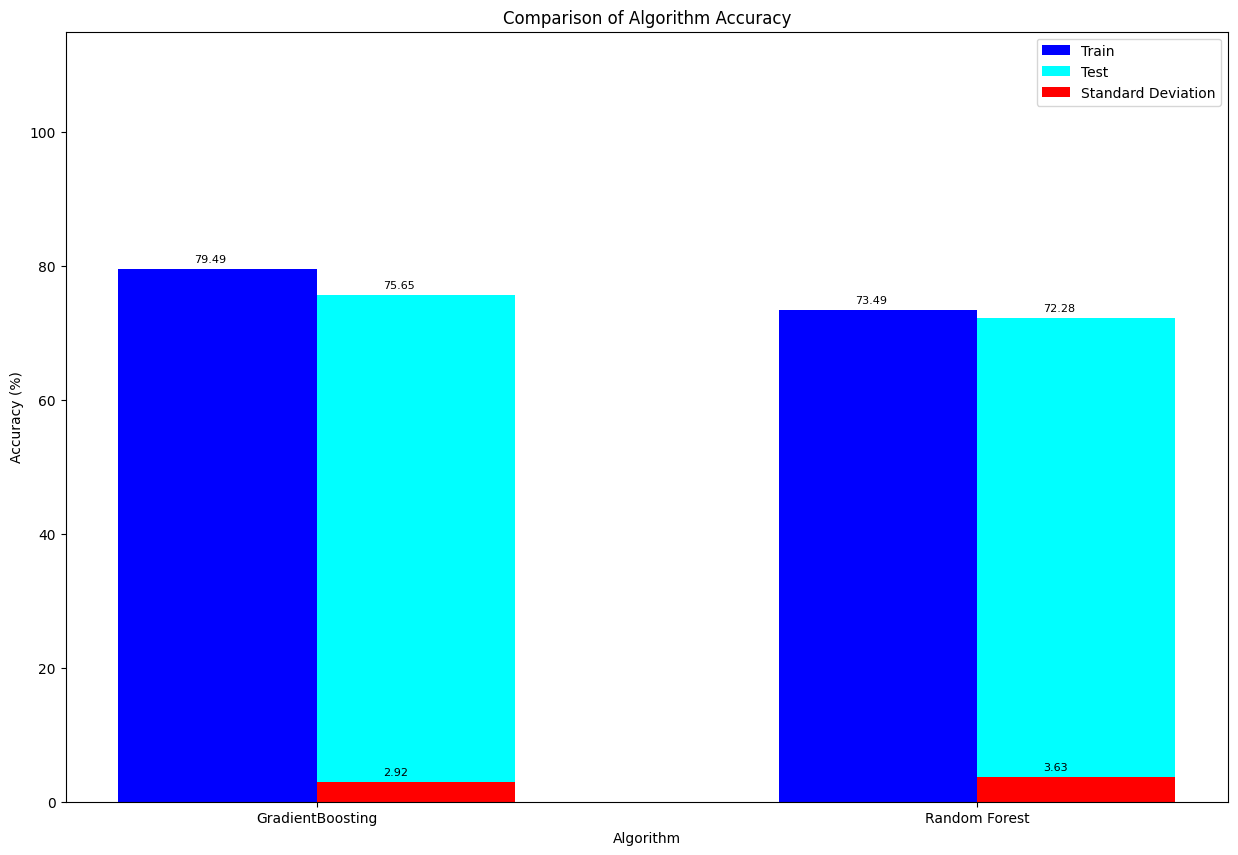

In [18]:
# create plot
#creates a new figure and axis for your plot, specifying the figure size.
fig, ax = plt.subplots(figsize=(15, 10))
#creates an array of evenly spaced values for the x-axis
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
#plotting
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Blue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color= 'Aqua', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='Red', label='Standard Deviation')
#Labeling
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracy') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))  